In [17]:
from imp import new_module

import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import ascii
import astropy.units as u
from numpy import dtype

/var/folders/h0/d6v2c2cx4nb11nq_hncwh5pc0000gn/T/ipykernel_41215/398105386.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import new_module


In [33]:
band = "H"
#band = "Ks"

coro_transmission = ascii.read(f'./input/N_ALC_YJH_S-IRDIS_BB_{band}-transmission.dat')
coro_transmission_Ks = coro_transmission.copy()
coro_transmission["sep_as"] = coro_transmission["sep_mas"] / 1000.  # convert to arcsec
print(coro_transmission.colnames)


['sep_mas', 'transmission', 'sep_as']


98.8495145631068


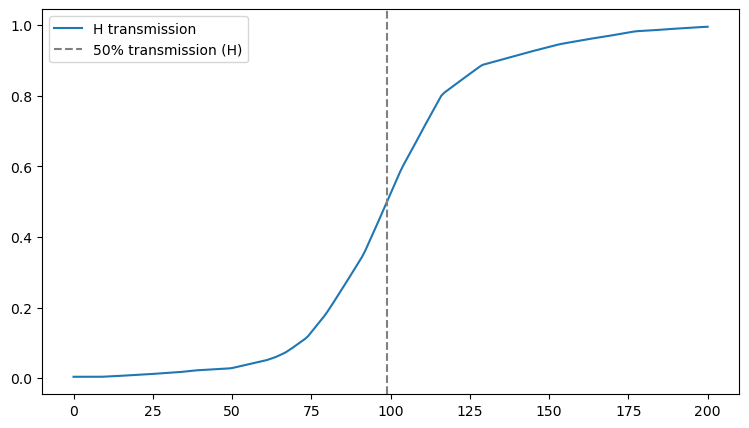

In [34]:
half_transmission = np.interp(0.5, coro_transmission["transmission"], coro_transmission["sep_mas"])
print(half_transmission)
fig, ax = plt.subplots(1, figsize=(9,5))
ax.plot(coro_transmission["sep_mas"], coro_transmission["transmission"], label="H transmission")
ax.axvline(half_transmission, label="50% transmission (H)", linestyle="--", c="grey")
plt.legend()
plt.show()


In [35]:
H = 1625e-9 #m
Ks = 2182e-9 #m
D = 8.2   #m

lambda_D_H = H / D * u.rad.to(u.mas)
print(lambda_D_H)

lambda_D_Ks = Ks / D * u.rad.to(u.mas)
print(lambda_D_Ks)

factor_half = half_transmission / lambda_D_H
print("50%", factor_half)
print("100%", 200/lambda_D_H)

40.87564757945506
54.88656185745905
50% 2.4182984348067085
100% 4.892888843197779


In [74]:
lambda_D_H_factors = coro_transmission["sep_mas"] / lambda_D_H

coro_transmission_Ks["sep_mas"] = lambda_D_H_factors * lambda_D_Ks
out_name = "./input/N_ALC_YJH_S-IRDIS_BB_Ks-transmission.dat"
coro_transmission_Ks["sep_mas"] = np.round(coro_transmission_Ks["sep_mas"], 4).astype(float)
coro_transmission_Ks["transmission"] = np.round(coro_transmission_Ks["transmission"],4).astype(float)
print(coro_transmission_Ks.colnames)
print(np.asarray(coro_transmission_Ks))
np.savetxt(out_name, np.asarray(coro_transmission_Ks), header="sep_mas transmission", comments="#", fmt='%.4f')


['sep_mas', 'transmission']
[(  0.    , 0.0042) (  1.3428, 0.0042) (  2.6855, 0.0042)
 (  4.0283, 0.0042) (  5.3711, 0.0042) (  6.7138, 0.0042)
 (  8.0566, 0.0042) (  9.3994, 0.0042) ( 10.7422, 0.0042)
 ( 12.0849, 0.0043) ( 13.4277, 0.0047) ( 14.7705, 0.0051)
 ( 16.1132, 0.0055) ( 17.456 , 0.006 ) ( 18.7988, 0.0065)
 ( 20.1415, 0.007 ) ( 21.4843, 0.0075) ( 22.8271, 0.0079)
 ( 24.1698, 0.0084) ( 25.5126, 0.0089) ( 26.8554, 0.0094)
 ( 28.1982, 0.0099) ( 29.5409, 0.0105) ( 30.8837, 0.0111)
 ( 32.2265, 0.0117) ( 33.5692, 0.0123) ( 34.912 , 0.0129)
 ( 36.2548, 0.0135) ( 37.5975, 0.0141) ( 38.9403, 0.0147)
 ( 40.2831, 0.0153) ( 41.6258, 0.0159) ( 42.9686, 0.0165)
 ( 44.3114, 0.0171) ( 45.6542, 0.018 ) ( 46.9969, 0.019 )
 ( 48.3397, 0.0199) ( 49.6825, 0.0208) ( 51.0252, 0.0217)
 ( 52.368 , 0.0226) ( 53.7108, 0.0231) ( 55.0535, 0.0237)
 ( 56.3963, 0.0242) ( 57.7391, 0.0248) ( 59.0818, 0.0253)
 ( 60.4246, 0.0259) ( 61.7674, 0.0264) ( 63.1102, 0.0269)
 ( 64.4529, 0.0274) ( 65.7957, 0.0279) ( 67.

132.7321281553398


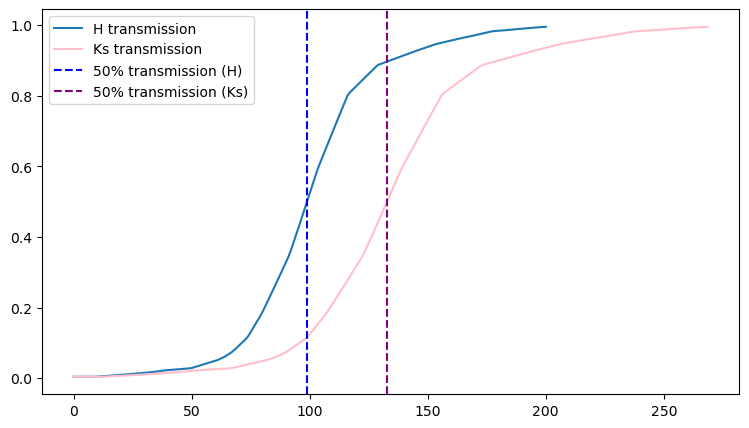

In [73]:
half_transmission_Ks = np.interp(0.5, coro_transmission_Ks["transmission"], coro_transmission_Ks["sep_mas"])
print(half_transmission_Ks)
fig, ax = plt.subplots(1, figsize=(9,5))
ax.plot(coro_transmission["sep_mas"], coro_transmission["transmission"], label="H transmission")
ax.plot(coro_transmission_Ks["sep_mas"], coro_transmission_Ks["transmission"], label="Ks transmission", c="pink")
ax.axvline(half_transmission, label="50% transmission (H)", linestyle="--", c="blue")
ax.axvline(half_transmission_Ks, label="50% transmission (Ks)", linestyle="--", c="purple")
plt.legend()
plt.show()
